In [1]:
from tradingSimulator import TradingSimulator
simulator = TradingSimulator()

In [ ]:
# strategy in {
#     'Buy and Hold',
#     'Sell and Hold',
#     'Trend Following Moving Averages',
#     'Mean Reversion Moving Averages',
#     'TDQN'
# }
# cryptocurrency in {'Bitcoin', 'Ethereum'}

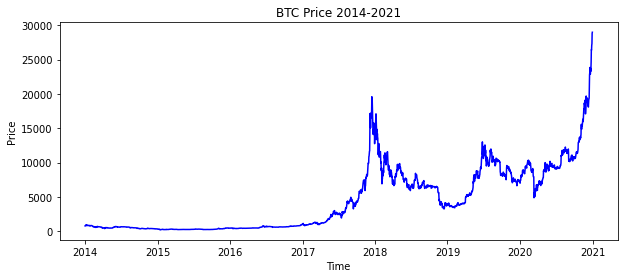

Number of empty elements: 
Open        0
High        0
Low         0
Close       0
Volume      0
ratio       0
Position    0
Action      0
Holdings    0
Cash        0
Money       0
Returns     0
dtype: int64
Number of duplicates: 
0


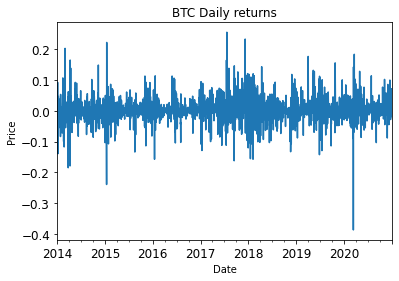

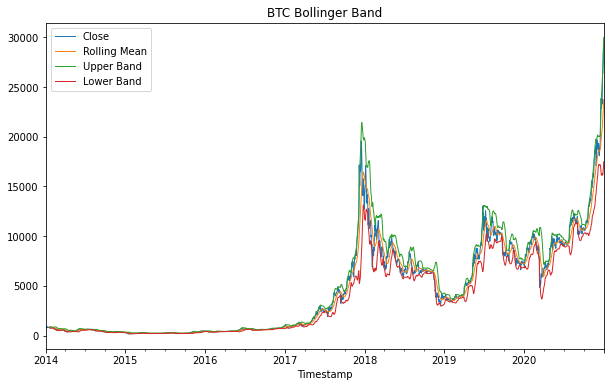

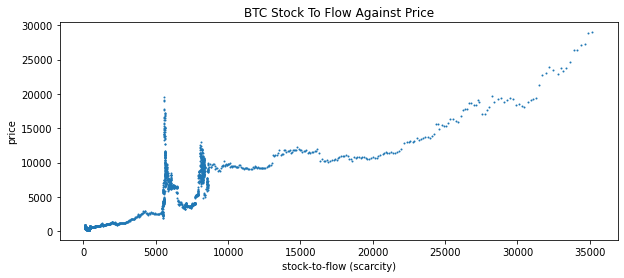

In [2]:
cryptocurrency = "Bitcoin"
simulator.exploratoryDataAnalysis(cryptocurrency, '2014-01-01', '2021-01-01')

In [ ]:
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100
stateLength = 30
AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    # Parameters related to the DQN algorithm
    'stateLength': stateLength,
    'numberOfEpisodes': 3,
    'gamma': 0.4,
    'learningRate': 0.0001,
    'targetNetworkUpdate': 1000,
    'learningUpdatePeriod': 1,
    'capacity': 100000,
    'batchSize': 32,
    'experiencesRequired': 1000,
    'epsilonStart': 1.0,
    'epsilonEnd': 0.01,
    'epsilonDecay': 10000,
    'name': 'training',
}

NON_AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    'name': 'training',
}

VALIDATION_BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'validation_backtest'
}

VALIDATION_PARAM = {
    'startingDate': '2017-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'validation_test'
}

BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'backtest'
}

TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'test'
}

ETH_TEST_PARAM = {
    'startingDate': '2016-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'test'
}

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
AI_TRAINING_PARAM['name'] = 'tdqn_training'
simulator.aiTrain(strategy, trainCryptocurrency, AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_BACKTEST_PARAM['name'] = 'tdqn_validation_backtest'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_BACKTEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_PARAM['name'] = 'tdqn_validation'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = 'tdqn_backtest'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, BACKTEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = 'tdqn_test'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, TEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
TEST_PARAM['name'] = 'tdqn_test'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
NON_AI_TRAINING_PARAM['name'] = 'b&h_training'
simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_BACKTEST_PARAM['name'] = 'b&h_validation_backtest'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_BACKTEST_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_PARAM['name'] = 'b&h_validation'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = 'b&h_backtest'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, BACKTEST_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = 'b&h_test'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, TEST_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
ETH_TEST_PARAM['name'] = 'b&h_test'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
NON_AI_TRAINING_PARAM['name'] = 's&h_training'
simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_BACKTEST_PARAM['name'] = 's&h_validation_backtest'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_BACKTEST_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_PARAM['name'] = 's&h_validation'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = 's&h_backtest'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, BACKTEST_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = 's&h_test'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, TEST_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
ETH_TEST_PARAM['name'] = 's&h_test'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
NON_AI_TRAINING_PARAM['name'] = 'tfma_training'
simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_BACKTEST_PARAM['name'] = "tfma_validation_backtest"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_BACKTEST_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_PARAM['name'] = "tfma_validation"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = "tfma_backtest"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, BACKTEST_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = "tfma_test"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, TEST_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
ETH_TEST_PARAM['name'] = "tfma_test"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
NON_AI_TRAINING_PARAM['name'] = 'mrma_training'
simulator.nonAitrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_BACKTEST_PARAM['name'] = "mrma_validation_backtest"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_BACKTEST_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
VALIDATION_PARAM['name'] = "mrma_validation"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, VALIDATION_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = "mrma_backtest"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, BACKTEST_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = "mrma_test"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, TEST_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
ETH_TEST_PARAM['name'] = "mrma_test"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, ETH_TEST_PARAM)
print()